# EMG spectrogram visualization

This notebook shows how to compute the spectrogram of the EMG samples capture by the Myo armband.

NOTE: you need to install the additional library `librosa` to generate the spectrogram plot.

In [1]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import math
import pandas as pd

In [10]:
import librosa
import matplotlib.pyplot as plt

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(len(specgram), 1, figsize=(16, 8))

    axs[0].set_title(title or "Spectrogram (db)")

    for i, spec in enumerate(specgram):
        im = axs[i].imshow(librosa.power_to_db(specgram[i]), origin="lower", aspect="auto")
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("Frame number")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)

def plot_signal(signal, title=None, ylabel="time"):
    fig, axs = plt.subplots(len(signal), 1, figsize=(16, 8))

    axs[0].set_title(title or "EMG signal")

    for i, sig in enumerate(signal):
        im = axs[i].plot(range(len(sig)), sig)
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)

    axs[i].set_xlabel("time")
    axs[i].get_xaxis().set_visible(True)
    plt.show(block=False)

def plot_general(signal):
    plt.plot(signal)
    plt.show()


In [3]:
# Sampling frequency is 160 Hz
# With 32 samples the frequency resolution after FFT is 160 / 32

n_fft = 30
win_length = None
hop_length = 1

spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    normalized=True
)


def compute_spectrogram(signal, title):
    freq_signal = [spectrogram(signal[:, i]) for i in range(8)]
    plot_spectrogram(freq_signal, title=title)
    return freq_signal

In [23]:
emg_annotations

description         start  \
0                                         calibration  1.655239e+09   
1   Get/replace items from refrigerator/cabinets/d...  1.655240e+09   
2                                     Peel a cucumber  1.655240e+09   
3                                     Peel a cucumber  1.655240e+09   
4                                     Peel a cucumber  1.655240e+09   
5                                 Clear cutting board  1.655240e+09   
6                                    Slice a cucumber  1.655240e+09   
7                                    Slice a cucumber  1.655240e+09   
8                                    Slice a cucumber  1.655240e+09   
9                                 Clear cutting board  1.655240e+09   
10  Get/replace items from refrigerator/cabinets/d...  1.655241e+09   
11                                      Peel a potato  1.655241e+09   
12                                      Peel a potato  1.655241e+09   
13                                      Peel a potato  1.655241e+09   
14                                Clear cutting board  1.655241e+09   
15                                     Slice a potato  1.655241e+09   
16                                     Slice a potato  1.655241e+09   
17                                     Slice a potato  1.655241e+09   
18                                Clear cutting board  1.655241e+09   
19  Get/replace items from refrigerator/cabinets/d...  1.655241e+09   
20                                        Slice bread  1.655241e+09   
21                                        Slice bread  1.655241e+09   
22                                        Slice bread  1.655241e+09   
23                                Clear cutting board  1.655241e+09   
24  Get/replace items from refrigerator/cabinets/d...  1.655241e+09   
25              Spread almond butter on a bread slice  1.655241e+09   
26              Spread almond butter on a bread slice  1.655241e+09   
27              Spread almond butter on a bread slice  1.655241e+09   
28                      Spread jelly on a bread slice  1.655241e+09   
29                      Spread jelly on a bread slice  1.655241e+09   
30                      Spread jelly on a bread slice  1.655241e+09   
31                                Clear cutting board  1.655241e+09   
32                  Open/close a jar of almond butter  1.655241e+09   
33                  Open/close a jar of almond butter  1.655241e+09   
34                  Open/close a jar of almond butter  1.655241e+09   
35  Get/replace items from refrigerator/cabinets/d...  1.655241e+09   
36             Pour water from a pitcher into a glass  1.655242e+09   
37             Pour water from a pitcher into a glass  1.655242e+09   
38             Pour water from a pitcher into a glass  1.655242e+09   
39             Pour water from a pitcher into a glass  1.655242e+09   
40             Pour water from a pitcher into a glass  1.655242e+09   
41  Get/replace items from refrigerator/cabinets/d...  1.655242e+09   
42                        Clean a plate with a sponge  1.655242e+09   
43                        Clean a plate with a sponge  1.655242e+09   
44                        Clean a plate with a sponge  1.655242e+09   
45                         Clean a plate with a towel  1.655242e+09   
46                         Clean a plate with a towel  1.655242e+09   
47                         Clean a plate with a towel  1.655242e+09   
48                          Clean a pan with a sponge  1.655242e+09   
49                          Clean a pan with a sponge  1.655242e+09   
50                          Clean a pan with a sponge  1.655242e+09   
51                           Clean a pan with a towel  1.655242e+09   
52                           Clean a pan with a towel  1.655242e+09   
53                           Clean a pan with a towel  1.655242e+09   
54  Get/replace items from refrigerator/cabinets/d...  1.655242e+09   
55  Get items from cabinets: 3 each large/small pl...  1.655242e+0

In [24]:
# Replace with your path to one of the subjects from Action-Net
emg_annotations = pd.read_pickle("../../an_data/EMG/S04_1.pkl")

sample_no = 10
signal = torch.from_numpy(emg_annotations.iloc[sample_no].myo_left_readings).float()
title = emg_annotations.iloc[sample_no].description


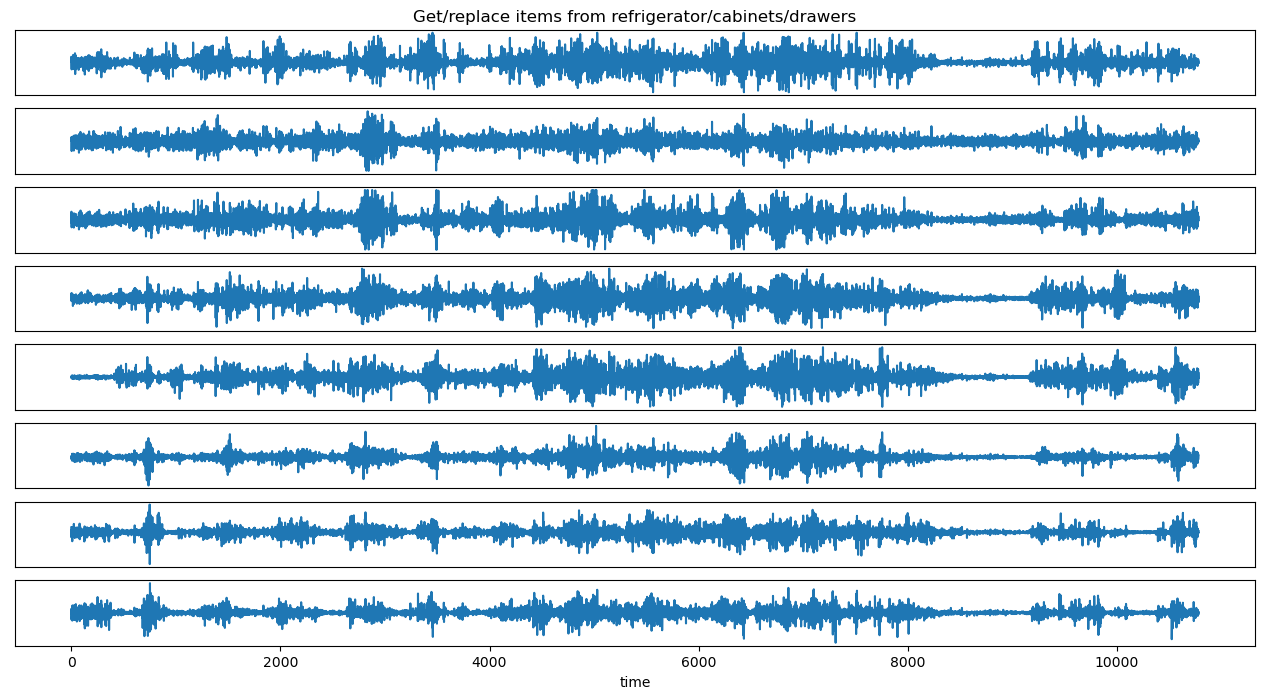

In [25]:
plot_signal(signal.T, title=title)

In [6]:
emg_annotations.iloc[sample_no]

description                                               Peel a cucumber
start                                                   1654640311.804312
stop                                                     1654640351.35253
myo_left_timestamps     [1654640311.8078036, 1654640311.811295, 165464...
myo_left_readings       [[-4, -2, 5, -1, 2, 1, -1, -4], [-3, 9, -3, 3,...
myo_right_timestamps    [1654640311.8053136, 1654640311.816281, 165464...
myo_right_readings      [[-19, -5, 2, 3, -17, 3, 28, -8], [13, 0, 6, 1...
Name: 4, dtype: object

In [6]:
dur = emg_annotations.iloc[sample_no].stop - emg_annotations.iloc[sample_no].start
print(f"The action last {dur} s")
print(f"The sampling frequency is 160Hz, so we have {dur*160} samples")
print(f"Left: {len(emg_annotations.iloc[sample_no].myo_left_readings)}")
print(f"Right: {len(emg_annotations.iloc[sample_no].myo_right_readings)}")
# Eccedono, bisogna croppare, io direi di farlo subito


The action last 39.54821801185608 s
The sampling frequency is 160Hz, so we have 6327.714881896973 samples
Left: 6275
Right: 6386


In [7]:
n_clip = 5
dur_clip = math.floor(dur*160/n_clip)

print(f"Each clip has {math.floor(dur_clip)} samples")

Each clip has 1265 samples


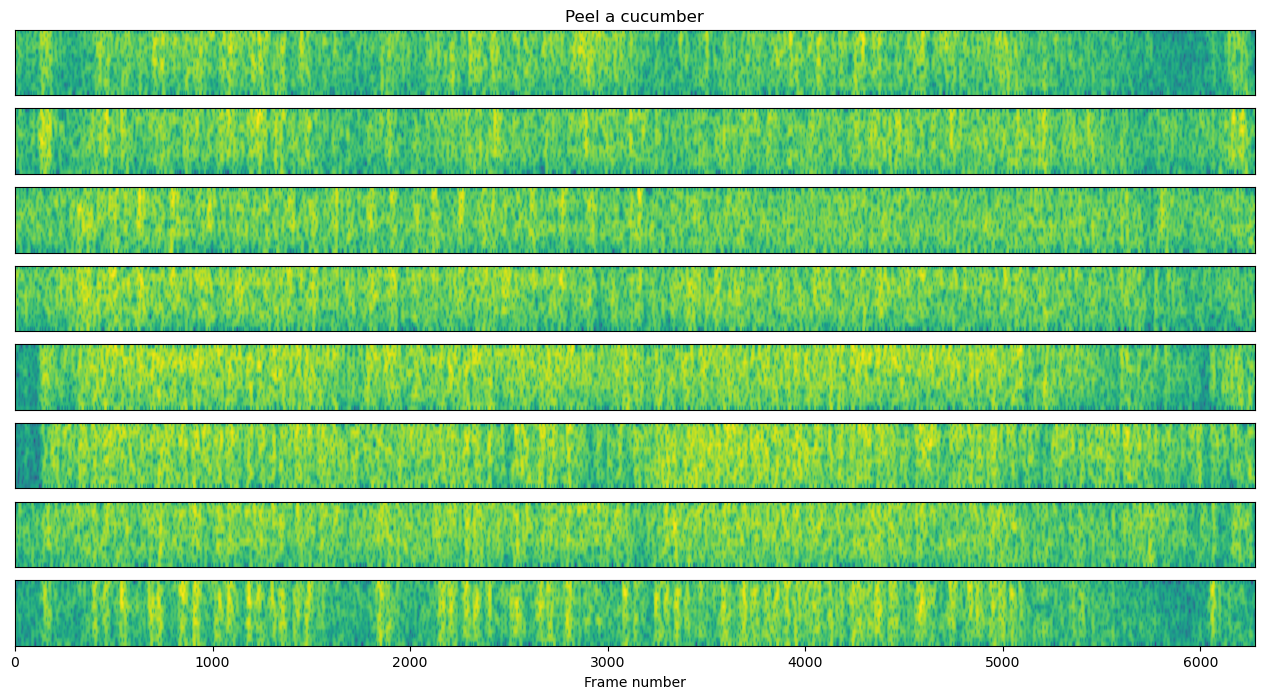

In [15]:
freq = compute_spectrogram(signal, title)

In [16]:
channel = freq[0]

channel.shape

torch.Size([16, 6276])

In [27]:
# supponiamo di ottenere gli indici dei frame come un array:
indices = [x for x in range(120, 152, 2)]

# li trasponiamo sulla giusta frequenza dello spectrogram
spec_indices = [int(i/30*160) for i in indices]

# e infine prendiamo dal canale 

channel_matrix = torch.stack([channel[:, i] for i in spec_indices])

In [28]:
channel_matrix.shape


torch.Size([16, 16])

In [37]:
sample_no = 9

sample = emg_annotations.iloc[sample_no]

readings = {
    'left': sample.myo_left_readings,
    'right': sample.myo_right_readings
}

freq = {}
result = []
for arm in ['left', 'right']:
    signal = torch.from_numpy(readings[arm]).float()
    freq[arm] = [spectrogram(signal[:, i]) for i in range(8)]
    for channel in freq[arm]:
        indices = [x for x in range(120, 152, 2)] # questa sarà poi la funzione get_train_indices, forse bisognerà fare dei cmabiamenti perchè poi c'è da aggiungere un offset
        spec_indices = [int(i/30*160) for i in indices]
        result.append(torch.stack([channel[:, i] for i in spec_indices]))
result = torch.stack(result)

result.shape

torch.Size([16, 16, 16])